In [1]:
include("Main_module.jl")
using .TDQMC

In [2]:
using DataFrames, CSV, PyPlot

In [3]:
df = CSV.read("Ground_Guide_Wave.csv", DataFrame)
tr = Matrix(CSV.read("Ground_Trajectory.csv", DataFrame))

1×500 Matrix{Float64}:
 0.175251  0.698886  -1.09586  3.41988  …  0.711265  0.973121  -0.797173

In [4]:
Electron_num = size(tr, 1)
Ensemble_num = size(tr, 2)
Total_num = Electron_num * Ensemble_num

500

In [5]:
initial_range = df[:, Total_num+1];         #最后一列保存的是空间的离散信息
Raw_Array = reshape(complex(Matrix(@. abs(parse(Complex{Float64}, df[:, 1:Total_num])))), (3001, Electron_num, Ensemble_num))         # 500代表的是系综*电子数的数目,因为是单电子所以不需要reshape

3001×1×500 Array{ComplexF64, 3}:
[:, :, 1] =
  5.326872014448201e-13 + 0.0im
 1.0654447260461073e-12 + 0.0im
 1.5983430003878883e-12 + 0.0im
 2.1314526767294514e-12 + 0.0im
 2.6648447551340912e-12 + 0.0im
  3.198590705422827e-12 + 0.0im
  3.732762588896535e-12 + 0.0im
 4.2674331797693416e-12 + 0.0im
  4.802676086255375e-12 + 0.0im
   5.33856587125001e-12 + 0.0im
  5.875178172545803e-12 + 0.0im
   6.41258982252208e-12 + 0.0im
 6.9508789672458855e-12 + 0.0im
                        ⋮
  6.412589822522005e-12 + 0.0im
 5.8751781725457375e-12 + 0.0im
  5.338565871249951e-12 + 0.0im
  4.802676086255326e-12 + 0.0im
 4.2674331797693044e-12 + 0.0im
    3.7327625888965e-12 + 0.0im
 3.1985907054227978e-12 + 0.0im
  2.664844755134066e-12 + 0.0im
   2.13145267672943e-12 + 0.0im
 1.5983430003878725e-12 + 0.0im
 1.0654447260460966e-12 + 0.0im
  5.326872014448145e-13 + 0.0im

[:, :, 2] =
  5.326872014448201e-13 + 0.0im
 1.0654447260461073e-12 + 0.0im
 1.5983430003878883e-12 + 0.0im
 2.1314526767294514e

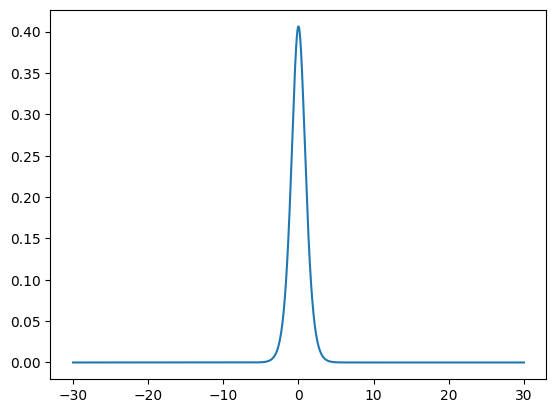

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall C:\Users\86187\.julia\packages\PyCall\3fwVL\src\numpy.jl:67


1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000000EE1160>

In [6]:
plot(initial_range, abs2.(Raw_Array[:,1,1]))

In [6]:
s_range = initial_range[end]
s_num = length(initial_range)

3001

In [7]:
l_range = 200.0
l_num = extend_num(s_range, l_range, s_num)

20001

In [8]:
P = Parameter{Float64,Int64}(space_N = l_num, scope = l_range, Δt = 0.05, step_t = 10000)

Parameter{Float64, Int64}(1, 500, [1], 20001, 200.0, 0.02, 0.0008, range(-200.0, stop=200.0, length=20001), 0.05, 10000)

In [9]:
Raw_GuideWave = stitch_Matrix(Raw_Array, l_num)

1×500 Matrix{Vector{ComplexF64}}:
 [0.0+0.0im, 0.0+0.0im, 0.0+0.0im, 0.0+0.0im, 0.0+0.0im, 0.0+0.0im, 0.0+0.0im, 0.0+0.0im, 0.0+0.0im, 0.0+0.0im  …  0.0+0.0im, 0.0+0.0im, 0.0+0.0im, 0.0+0.0im, 0.0+0.0im, 0.0+0.0im, 0.0+0.0im, 0.0+0.0im, 0.0+0.0im, 0.0+0.0im]  …  [0.0+0.0im, 0.0+0.0im, 0.0+0.0im, 0.0+0.0im, 0.0+0.0im, 0.0+0.0im, 0.0+0.0im, 0.0+0.0im, 0.0+0.0im, 0.0+0.0im  …  0.0+0.0im, 0.0+0.0im, 0.0+0.0im, 0.0+0.0im, 0.0+0.0im, 0.0+0.0im, 0.0+0.0im, 0.0+0.0im, 0.0+0.0im, 0.0+0.0im]

In [10]:
Raw_GuideWave[1,1][10001]

0.6373433810433393 + 0.0im

In [11]:
@timev Dy = Dynamics{Float64,Int64}(Trajectory = deepcopy(tr), Guide_Wave = deepcopy(Raw_GuideWave), Displace = zeros(Float64, (P.step_t + 1, Ensemble_num, Electron_num)),
    Time = zeros(typeof(P.Δt), Ensemble_num))

  0.307370 seconds (363.05 k allocations: 210.660 MiB, 58.10% compilation time)
elapsed time (ns): 307369500
bytes allocated:   220892746
pool allocs:       362490
non-pool GC allocs:59
malloc() calls:    501


Dynamics{Float64, Int64}([0.17525140136618608 0.6988857496446885 … 0.9731208167982772 -0.7971729618549642], Vector{ComplexF64}[[0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im  …  0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im] [0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im  …  0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im] … [0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im  …  0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im] [0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 

In [14]:
@timev begin 
    df = nothing
    Raw_DuideWave = nothing
    Raw_Array = nothing
    tr = nothing
    GC.gc()
end

  0.355494 seconds (99.99% gc time)
elapsed time (ns): 355493500
gc time (ns):      355455200
GC pauses:         1
full collections:  1


In [15]:
Dy

Dynamics{Float64, Int64}([0.17525140136618608 0.6988857496446885 … 0.9731208167982772 -0.7971729618549642], Vector{ComplexF64}[[0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im  …  0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im] [0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im  …  0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im] … [0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im  …  0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im] [0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 

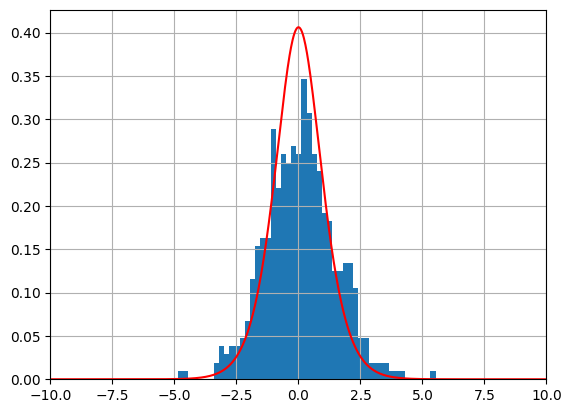

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall C:\Users\86187\.julia\packages\PyCall\3fwVL\src\numpy.jl:67


(-10.0, 10.0)

In [16]:
hist(Dy.Trajectory', 50, density = true);
plot(P.sampling, abs2.(Dy.Guide_Wave[1]), color = "red")      #说明长度能够吻合上
grid()
xlim(-10, 10)

In [17]:
P

Parameter{Float64, Int64}(1, 500, [1], 20001, 200.0, 0.02, 0.0008, range(-200.0, stop=200.0, length=20001), 0.05, 10000)

In [15]:
parallel_Evolution!(P, Dy)